
# Image augmentation

* This notebook shows results of different online augmentation and preprocessing methods on image batches. You can see what images will be used in training and validation with selected parameters
* You can select the original or preprocessed dataset (if you created one using the jupyter notebook ***offline_preprocessing.ipynb***).  
* You can also pass a custom preprocessing function to the generator, if you want it to be applied online (they are defined in file ***image_preprocessing.py***). If you want, you can create your own, more information can be found in TensorFlow documentation  
* The creation of ImageDataGenerators and flows from directory is defined in file ***utils.py***, see it for additional information on parameters and their default values

In [22]:
import numpy as np
import pandas as pd

from image_preprocessing import *
from utils import *

import matplotlib.pyplot as plt
%matplotlib inline

# Constants and parameters

In [20]:
DATASET_DIR = '../datasets/original/' # Dataset directory, from which we want to create and inspect baches
DATASET_PATH = '../datasets/tvt_detailed_paths.csv' # Path to csv file with dataset information (train-valid-test split)
COLUMNS = 4 # Number of columns when plotting images

# Parameters for ImageDataGenerators function
ROTATION_R = 20 # Rotation range
W_SHIFT_R = 0.05 # Width shift range
H_SHIFT_R = 0.05 # Height shift range
BRIGHTNESS_R = (0.9, 1.1) # Brightness range
ZOOM_R = 0.1 # Zoom range
H_FLIP = True # Flip the image horizontally
PRE_FUNC = rescale # Preprocessing function

# Parameters for dataframe flows
IMG_SIZE = (224, 224) # Image target size
BATCH_SIZE = 8 # Number of images per batch

# Create generators and flows

In [15]:
# Specify dataset portion to be used
train_df = get_dataframe('ALL', 'train', DATASET_PATH)
valid_df = get_dataframe('ALL', 'valid', DATASET_PATH)

## Generators

In [16]:
# Create two generators, train_gen uses augmentation, valid_gen does not
# More information on ImageDataGenerator parameters can be found in TensorFlow documentation
# Pre_func is applied to each image before feeding it to the model
train_gen, valid_gen = create_generators(rotation_r=ROTATION_R,
                                         w_shift_r=W_SHIFT_R,
                                         h_shift_r=H_SHIFT_R,
                                         brightness_r=BRIGHTNESS_R,
                                         zoom_r=ZOOM_R,
                                         h_flip=H_FLIP,
                                         pre_func=PRE_FUNC)

## Dataframe flows

In [19]:
# Create dataframe flows using the generators
train_flow, valid_flow = create_dataframe_flows(train_gen=train_gen,
                                                valid_gen=valid_gen,
                                                train_df=train_df,
                                                valid_df=valid_df,
                                                directory=DATASET_DIR,
                                                img_size=IMG_SIZE,
                                                batch_size=BATCH_SIZE)

# Optional - turn of shuffling, so you can pair image order with the order of flow.filepaths to find original image
# train_flow.shuffle = False
# valid_flow.shuffle = False

Found 36260 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.


# Visualizing each batch

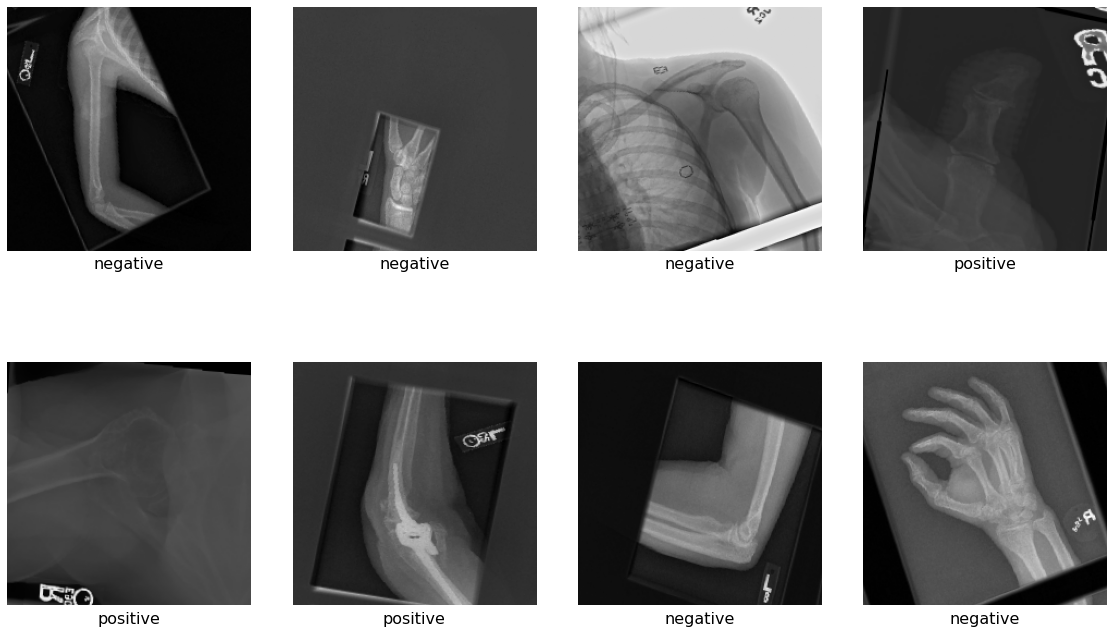

In [49]:
# Get next image batch
batch=next(train_flow)

fig, axes = plt.subplots(int(np.ceil(BATCH_SIZE/COLUMNS)), COLUMNS, figsize=(16,10))
fig.tight_layout()

# Plot all images with their corresponding labels
for i, ax in enumerate(axes.reshape(-1)):
    ax.imshow(batch[0][i])
    if batch[1][i]:
        ax.set_title("positive", fontsize=16, y=-0.1)
    else:
        ax.set_title("negative", fontsize=16, y=-0.1)
    ax.axis("off")
    
plt.show()